In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [8]:
music_data = pd.read_csv("C:/Users/DELL/projects/Music Info/Music Info.csv")
music_data.head(2)

,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...,09ZQ5TmUG8TSL56n0knqrj,"rock, alternative, indie, alternative_rock, in...",NaN,2004,222200,0.355,...,1,-4.360,1,0.0746,0.001190,0.0,0.0971,0.240,148.114,4
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...,06UfBBDISthj1ZJAtX4xjj,"rock, alternative, indie, pop, alternative_roc...",NaN,2006,258613,0.409,...,2,-4.373,1,0.0336,0.000807,0.0,0.2070,0.651,174.426,4


In [9]:
# Analyze most popular artists
artist_counts = music_data['artist'].value_counts()
print("Top 10 Most Popular Artists:")
print(artist_counts.head(10))


Top 10 Most Popular Artists:
artist
The Rolling Stones    132
Radiohead             111
Autechre              105
Tom Waits             100
Bob Dylan              98
The Cure               94
Metallica              85
Johnny Cash            84
Nine Inch Nails        83
Sonic Youth            81
Name: count, dtype: int64


In [10]:
# Analyze genres from tags
all_genres = []
for tags in music_data['tags']:
    if isinstance(tags, str):
        genres = [g.strip() for g in tags.split(',')]
        all_genres.extend(genres)

genre_counts = pd.Series(all_genres).value_counts()
print("\nTop 10 Most Popular Genres:")
print(genre_counts.head(10))


Top 10 Most Popular Genres:
rock                10684
indie                7287
electronic           6594
alternative          6274
pop                  4651
female_vocalists     4517
alternative_rock     4137
indie_rock           3801
metal                3181
classic_rock         2779
Name: count, dtype: int64


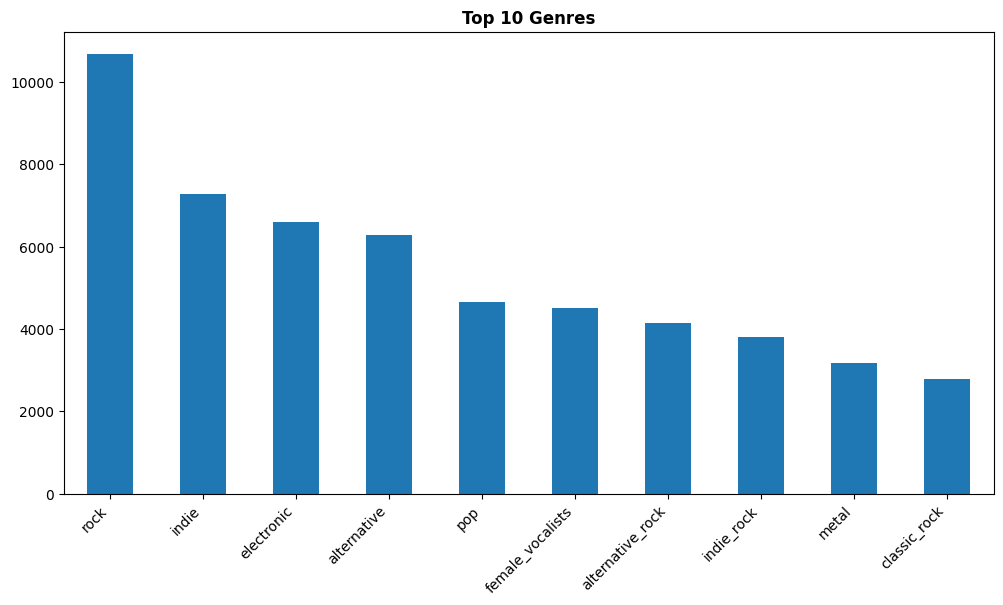

In [11]:
plt.figure(figsize=(12, 6))
genre_counts.head(10).plot(kind='bar')
plt.title('Top 10 Genres',fontweight='bold')
plt.xticks(rotation=45, ha='right');

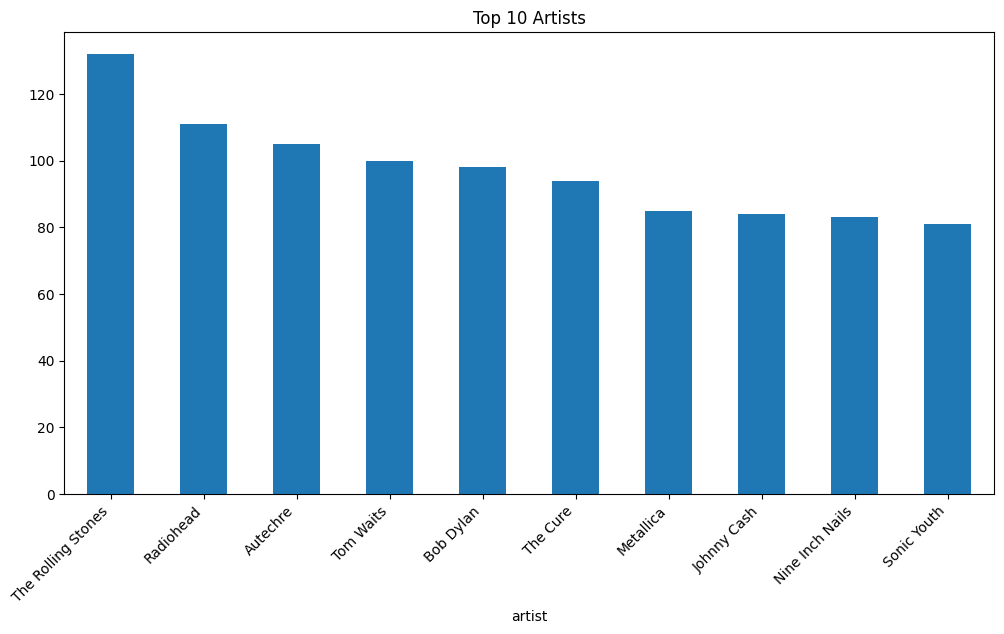

In [12]:
plt.figure(figsize=(12, 6))
artist_counts.head(10).plot(kind='bar')
plt.title('Top 10 Artists')
plt.xticks(rotation=45, ha='right');

In [13]:
# Analysis of Music Trends Over Time

# Calculate yearly trends
yearly_trends = music_data.groupby('year').agg({
    'danceability': 'mean',
    'energy': 'mean',
    'loudness': 'mean',
    'valence': 'mean',
    'tempo': 'mean',
    'acousticness': 'mean'
}).reset_index()

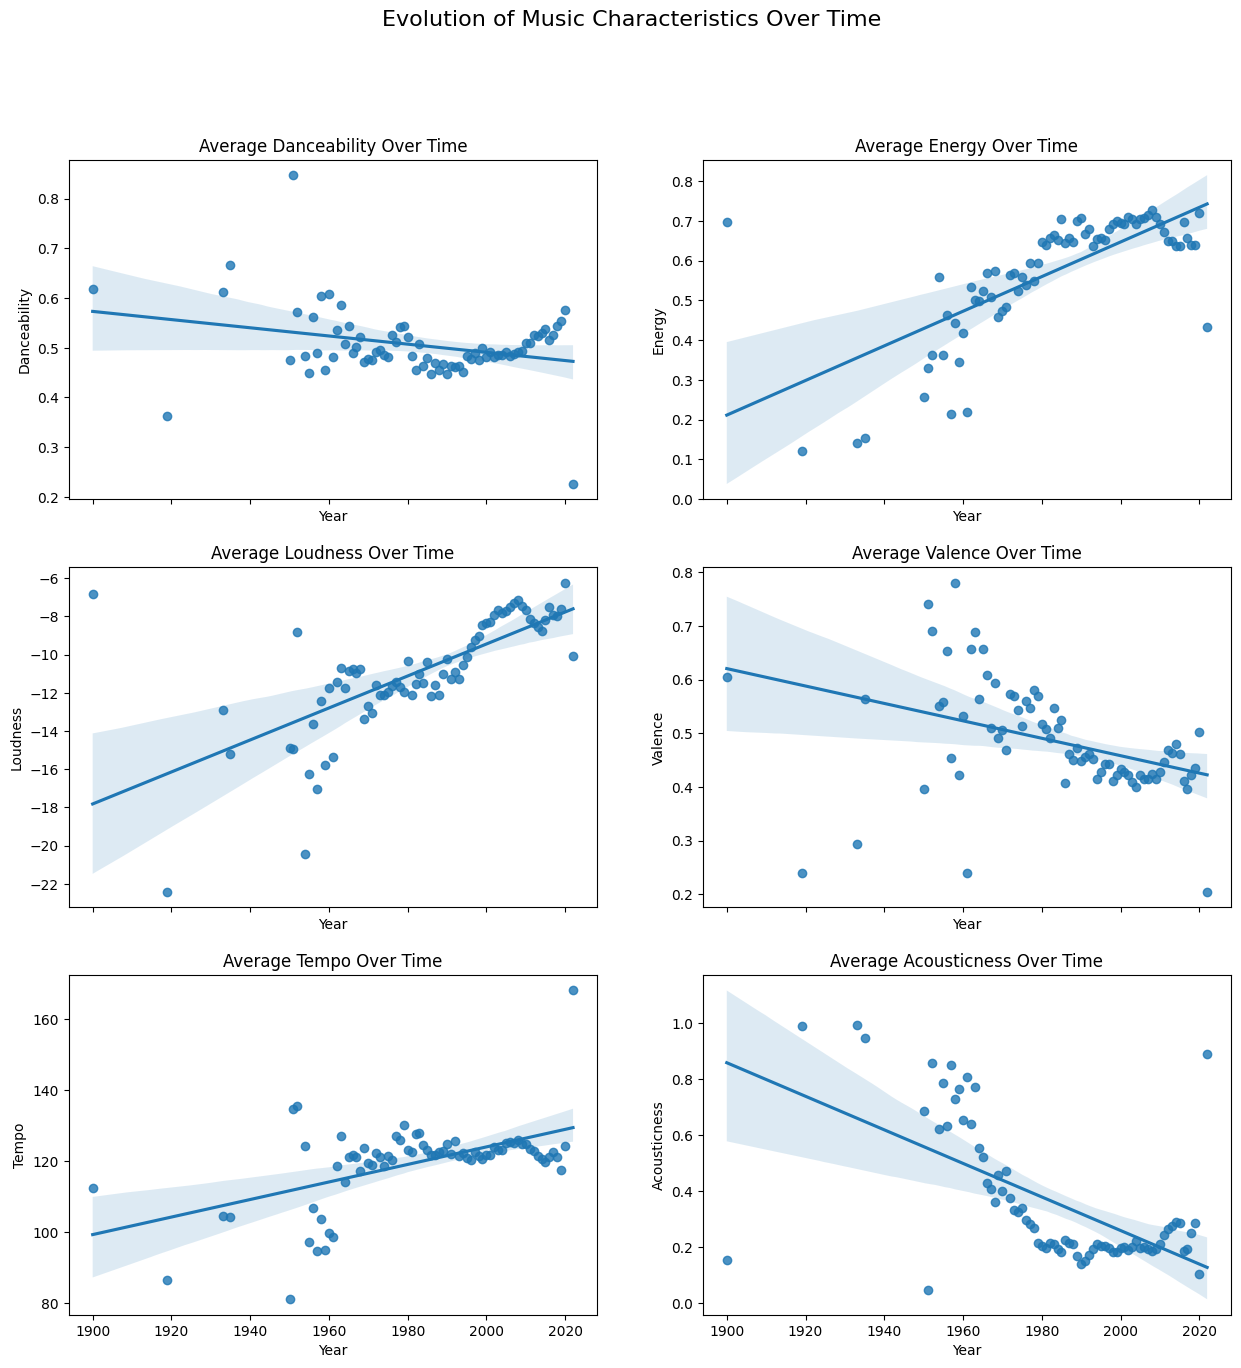

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15), sharex=True)
fig.suptitle('Evolution of Music Characteristics Over Time', fontsize=16)


features = ['danceability', 'energy', 'loudness', 'valence', 'tempo', 'acousticness']
for idx, feature in enumerate(features):
    row = idx // 2
    col = idx % 2
    
    sns.regplot(data=yearly_trends, x='year', y=feature, ax=axes[row, col])
    axes[row, col].set_title(f'Average {feature.capitalize()} Over Time')
    axes[row, col].set_xlabel('Year')
    axes[row, col].set_ylabel(feature.capitalize())

<Figure size 1500x800 with 0 Axes>

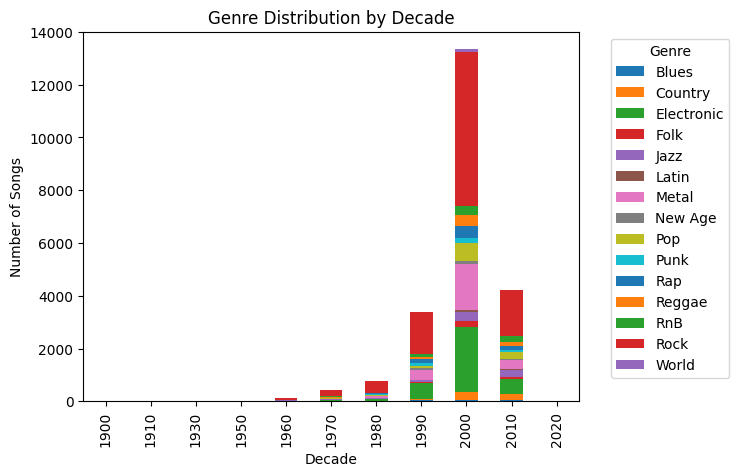

In [15]:
# Analyze genre distribution
music_data['decade'] = (music_data['year'] // 10) * 10
plt.figure(figsize=(15, 8))
genre_by_decade = music_data.groupby('decade')['genre'].value_counts().unstack()
genre_by_decade.plot(kind='bar', stacked=True)
plt.title('Genre Distribution by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Songs')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1));

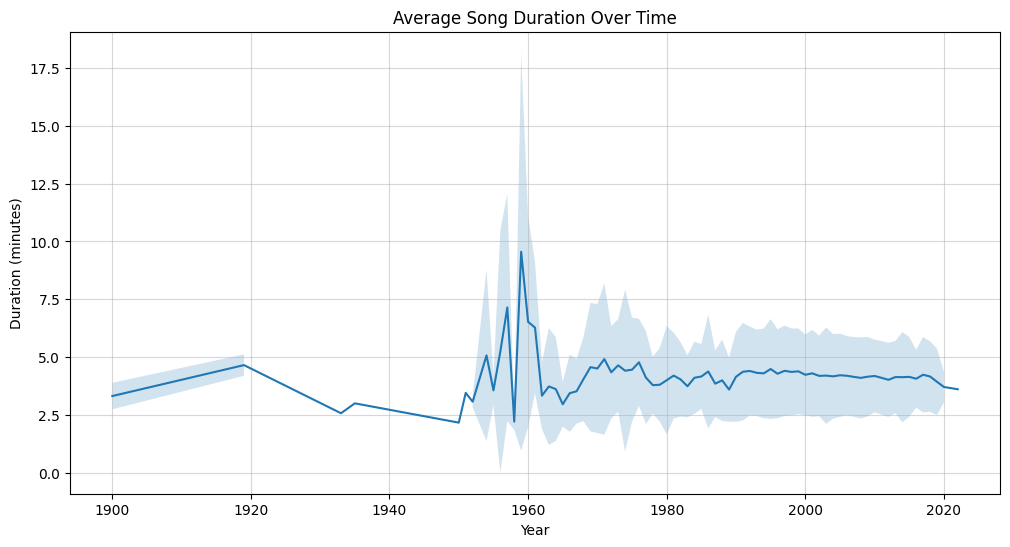

In [16]:
# Analyze song duration trends
yearly_duration = music_data.groupby('year')['duration_ms'].agg(['mean', 'std']).reset_index()
yearly_duration['mean_minutes'] = yearly_duration['mean'] / (1000 * 60)

plt.figure(figsize=(12, 6))
plt.plot(yearly_duration['year'], yearly_duration['mean_minutes'])
plt.fill_between(
    yearly_duration['year'],
    (yearly_duration['mean'] - yearly_duration['std'])/(1000 * 60),
    (yearly_duration['mean'] + yearly_duration['std'])/(1000 * 60),
    alpha=0.2
)
plt.title('Average Song Duration Over Time')
plt.xlabel('Year')
plt.ylabel('Duration (minutes)')
plt.grid(True, alpha=0.5)


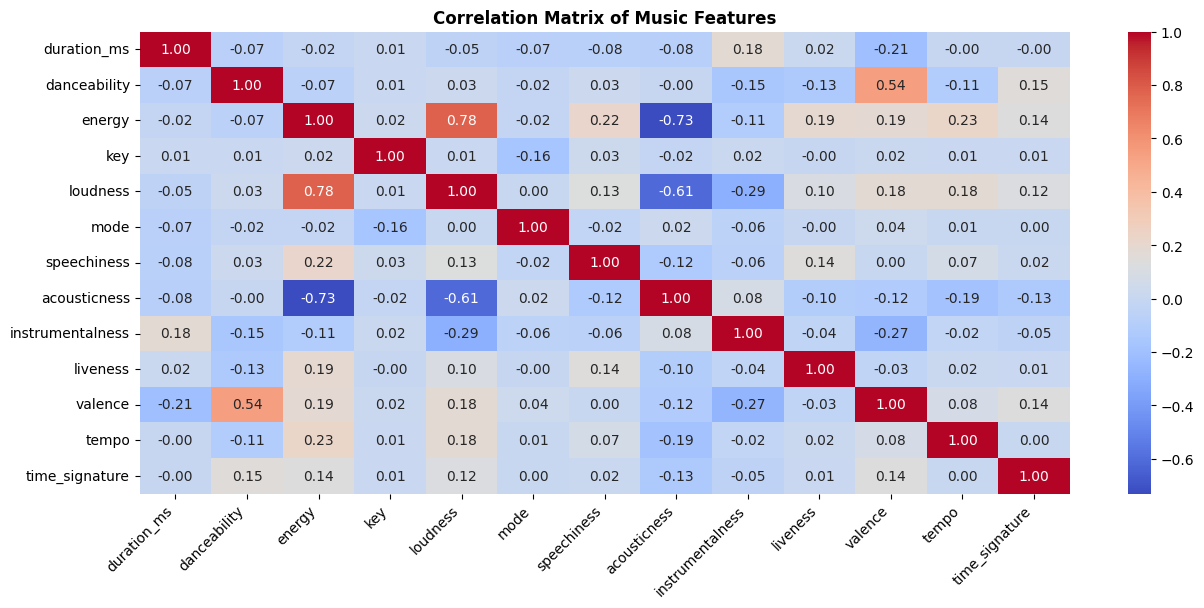

In [17]:
selected_columns = ['duration_ms', 'danceability', 'energy', 'key',
                    'loudness', 'mode', 'speechiness', 'acousticness', 
                    'instrumentalness', 'liveness', 'valence', 
                    'tempo', 'time_signature']

# Extract the relevant data from the DataFrame
music_info = music_data[selected_columns]

# Calculate the correlation matrix
correlation_matrix = music_info.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Music Features', fontweight='bold')
plt.xticks(rotation=45, ha='right');

In [18]:
listening_history = pd.read_csv("C:/Users/DELL/projects/User Listening History/User Listening History.csv")

listening_history.head()


,track_id,user_id,playcount
0,TRIRLYL128F42539D1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
1,TRFUPBA128F934F7E1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
2,TRLQPQJ128F42AA94F,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
3,TRTUCUY128F92E1D24,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
4,TRHDDQG12903CB53EE,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1


In [19]:
# Getting play counts for each song 
play_counts = listening_history["track_id"].value_counts()
music_data["popularity"] = music_data["track_id"].map(play_counts).fillna(0)


In [20]:
# Getting popular song (top 25% by play count)
popularity_threshold = music_data["popularity"].quantile(0.75)
popular_songs = music_data[music_data["popularity"] >= popularity_threshold]


In [21]:
# Extracting and counting tags from popular songs
popular_tags = []
for tags in popular_songs["tags"]:
    if isinstance(tags, str):
        tag_list = [tag.strip().lower() for tag in tags.split(",")]
        popular_tags.extend(tag_list)

# Creating tag frequency for tags
tag_frequency = pd.Series(popular_tags).value_counts()

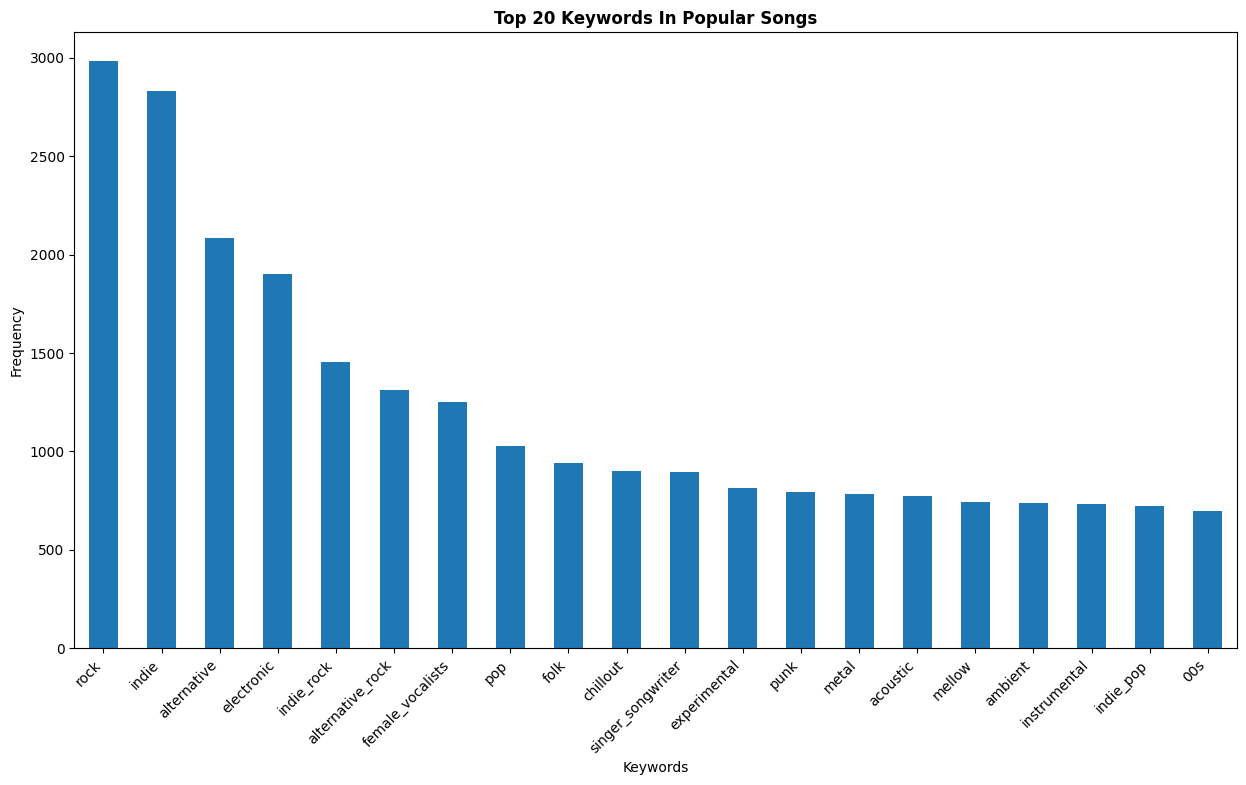

In [22]:
# Plotting the top 20 tags among the population
plt.figure(figsize=(15, 8))
tag_frequency.head(20).plot(kind= "bar")
plt.title("Top 20 Keywords In Popular Songs", fontweight = "bold")
plt.xlabel("Keywords")
plt.ylabel("Frequency")
plt.xticks(rotation = 45, ha= "right");

In [23]:
# The top 20 keywords in popular songs
print("Top 20 Keywords in Popular Songs: ")
tag_frequency.head(20)

Top 20 Keywords in Popular Songs: 


rock                 2981
indie                2833
alternative          2086
electronic           1903
indie_rock           1455
alternative_rock     1313
female_vocalists     1249
pop                  1025
folk                  940
chillout              901
singer_songwriter     896
experimental          814
punk                  795
metal                 784
acoustic              772
mellow                742
ambient               738
instrumental          730
indie_pop             720
00s                   699
Name: count, dtype: int64

In [24]:
top_tags = list(tag_frequency.head(5).index)

print("Average Audio Feature for Songs with Top Tags:")
for tag in top_tags:
    songs_with_tags = music_data[music_data["tags"].str.contains(tag, na= False)]

    print(f"\nTag: {tag}")
    for feat in features:
        avg_value = songs_with_tags[feat].mean()
        print(f"{feat}: {avg_value:.3f}")

Average Audio Feature for Songs with Top Tags:

Tag: rock
danceability: 0.467
energy: 0.713
loudness: -7.722
valence: 0.461
tempo: 126.139
acousticness: 0.170

Tag: indie
danceability: 0.487
energy: 0.655
loudness: -7.892
valence: 0.443
tempo: 125.390
acousticness: 0.245

Tag: alternative
danceability: 0.477
energy: 0.717
loudness: -7.303
valence: 0.441
tempo: 126.638
acousticness: 0.161

Tag: electronic
danceability: 0.582
energy: 0.674
loudness: -9.017
valence: 0.436
tempo: 124.408
acousticness: 0.188

Tag: indie_rock
danceability: 0.468
energy: 0.723
loudness: -6.905
valence: 0.458
tempo: 128.274
acousticness: 0.156



Most Common Tag Combinations in Popular Songs:
(alternative, rock)                1384
(indie, indie_rock)                1229
(alternative_rock, rock)           1105
(alternative, indie)                998
(indie, rock)                       945
(alternative, alternative_rock)     899
(indie_rock, rock)                  741
(alternative, indie_rock)           667
(indie, indie_pop)                  646
(folk, indie)                       551
Name: count, dtype: int64


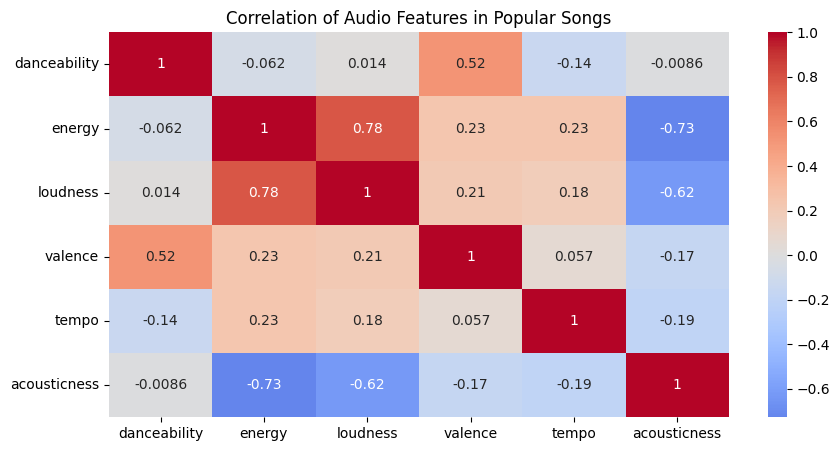

In [25]:
# Creating a heatmap of tag co-occurrence in popular songs
tag_pairs = []
for tags in popular_songs['tags']:
    if isinstance(tags, str):
        tag_list = [tag.strip().lower() for tag in tags.split(',')]
        for i in range(len(tag_list)):
            for j in range(i + 1, len(tag_list)):
                tag_pairs.append(tuple(sorted([tag_list[i], tag_list[j]])))

pair_freq = pd.Series(tag_pairs).value_counts()

print("\nMost Common Tag Combinations in Popular Songs:")
print(pair_freq.head(10))

# Plot correlation between audio features for popular songs
plt.figure(figsize=(10, 5))
correlation = popular_songs[features].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation of Audio Features in Popular Songs');